<a href="https://colab.research.google.com/github/Cshoga/MML_Formative2/blob/main/Copy_of_Template_PCA_Formative_1%5BPeer_Pair_Number%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

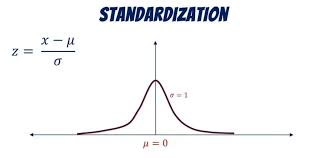


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("GI_AII.csv")

numeric_data = df.select_dtypes(include=[np.number])

numeric_data.isna().sum()
df.head()

,STRUCTURE,STRUCTURE_ID,ACTION,FREQ,FREQ_LABEL,REF_AREA,REF_AREA_LABEL,INDICATOR,INDICATOR_LABEL,SEX,...,UNIT_MULT_LABEL,UNIT_TYPE,UNIT_TYPE_LABEL,TIME_FORMAT,TIME_FORMAT_LABEL,COMMENT_OBS,OBS_STATUS,OBS_STATUS_LABEL,OBS_CONF,OBS_CONF_LABEL
0,datastructure,WB.DATA360:DS_DATA360(1.2),I,A,Annual,DZA,Algeria,GI_AII_1,"In law, the independence of the judiciary is g...",_T,...,Units,IX,Index,602,CCYY,NaN,A,Normal value,PU,Public
1,datastructure,WB.DATA360:DS_DATA360(1.2),I,A,Annual,DZA,Algeria,GI_AII_1,"In law, the independence of the judiciary is g...",_T,...,Units,IX,Index,602,CCYY,NaN,A,Normal value,PU,Public
2,datastructure,WB.DATA360:DS_DATA360(1.2),I,A,Annual,DZA,Algeria,GI_AII_1,"In law, the independence of the judiciary is g...",_T,...,Units,IX,Index,602,CCYY,NaN,A,Normal value,PU,Public
3,datastructure,WB.DATA360:DS_DATA360(1.2),I,A,Annual,DZA,Algeria,GI_AII_1,"In law, the independence of the judiciary is g...",_T,...,Units,IX,Index,602,CCYY,NaN,A,Normal value,PU,Public
4,datastructure,WB.DATA360:DS_DATA360(1.2),I,A,Annual,DZA,Algeria,GI_AII_1,"In law, the independence of the judiciary is g...",_T,...,Units,IX,Index,602,CCYY,NaN,A,Normal value,PU,Public


In [3]:
# @title
numeric_data.isna().sum().sort_values(ascending=False)

,0
COMMENT_OBS,67716
OBS_VALUE,21869
TIME_PERIOD,0
UNIT_MULT,0
TIME_FORMAT,0


In [4]:
numeric_data = numeric_data.apply(
    lambda col: col.fillna(col.mean()) if col.notna().any() else col.fillna(0)
)

In [5]:
numeric_data.isna().any().any()

np.False_

In [6]:
data = numeric_data.values

In [7]:
# Step 1: Load and Standardize the data (use of numpy only allowed)
import numpy as np

std_check = np.std(data, axis=0)
zero_std_columns = np.where(std_check == 0)[0]

filtered_data = np.delete(data, zero_std_columns, axis=1)

mean = np.mean(filtered_data, axis=0)
std = np.std(filtered_data, axis=0)

standardized_data = (filtered_data - mean) / std

standardized_data[:5]


array([[-1.58113883, -1.31984963],
       [-1.26491106, -1.31984963],
       [-0.9486833 , -1.31984963],
       [-0.63245553, -1.31984963],
       [-0.31622777, -1.31984963]])

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [8]:
# Step 3: Calculate the Covariance Matrix
n_samples = standardized_data.shape[0]
cov_matrix = (standardized_data.T @ standardized_data) / (n_samples - 1)

cov_matrix

array([[ 1.00001477, -0.05912775],
       [-0.05912775,  1.00001477]])

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [9]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

eigenvalues, eigenvectors

(array([1.05914252, 0.94088702]),
 array([[ 0.70710678,  0.70710678],
        [-0.70710678,  0.70710678]]))

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [10]:
# Step 5: Sort Principal Components
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

sorted_eigenvectors

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [11]:
# Step 6: Project Data onto Principal Components
num_components = 2
principal_components = sorted_eigenvectors[:, :num_components]

reduced_data = standardized_data @ principal_components

reduced_data[:5]

array([[-0.18475937, -2.05130861],
       [ 0.03884743, -1.82770181],
       [ 0.26245423, -1.60409502],
       [ 0.48606103, -1.38048822],
       [ 0.70966783, -1.15688142]])

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [12]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')
reduced_data[:5]

Reduced Data Shape: (67716, 2)


array([[-0.18475937, -2.05130861],
       [ 0.03884743, -1.82770181],
       [ 0.26245423, -1.60409502],
       [ 0.48606103, -1.38048822],
       [ 0.70966783, -1.15688142]])

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

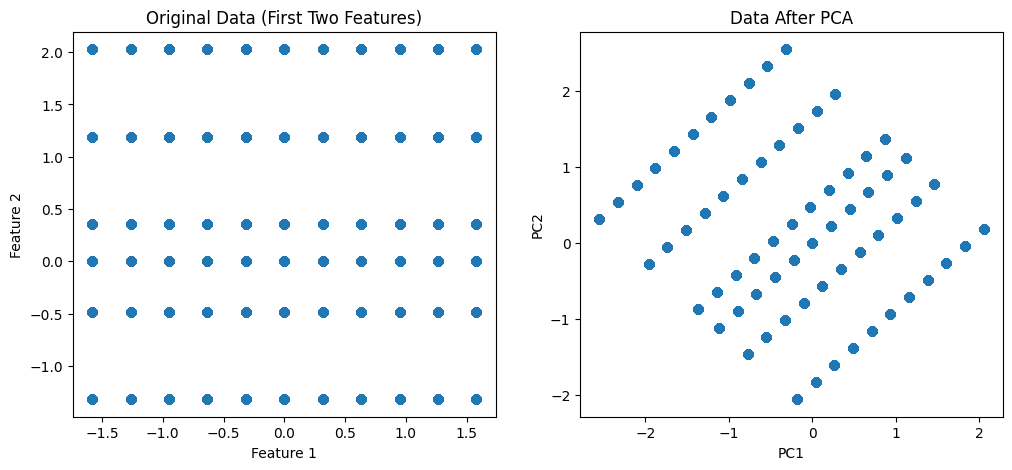

In [13]:
# Step 8: Visualize Before and After PCA
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(standardized_data[:, 0], standardized_data[:, 1])
plt.title("Original Data (First Two Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1, 2, 2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.title("Data After PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()